## Numerical example for clustering

- Let us do clustering in 2D only two dimensions and observe the weather patterns
- I am using 2 D data for demo purpose as it is easy for visualization and understanding
- We are categorizing weather into 3 types namely
    1. Hot and Humid
    2. Moderate
    3. Cold and dry
    
    
I have created a simple data set of temperature and humidity

As there are 3 categories `k = 3` in this example

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Let us create data set

### columns:
1. Temperature: in celsius
2. Humidity in percentage

In [300]:
temperature = pd.DataFrame(
    {
        "temperature": [34,32,38,30,35,26,13,11,7,-2,6,0,-4,10],
        "Humidity":    [80,90,70,92,77,80,46,41,50,28,62,30,42,50]
    }
)
temperature.head()

,temperature,Humidity
0,34,80
1,32,90
2,38,70
3,30,92
4,35,77


## For Clustering Algorithm the random sample of centeroid is assumed

* As we are classifiying 3 clusters we will create 3 random centeroid
* We will compute the Euclidian distance of the points from the assumed centeroid and predict the pattern
* The Centeroid which is closest to the datapoint is the predicted cluster


To simplify 

let us assume we are using the data point (34,80) we will compute the distance of that point from the 3 centeroids. The centeroid which is closest to the point is the predicted class

This process is iterative until we reach the best classification point

In [301]:
np.random.seed(40)

X_random1 = np.random.choice(np.array(temperature["temperature"]))
Y_random1 = np.random.choice(np.array(temperature["Humidity"]))

centroid_init_class1 = X_random1,Y_random1

np.random.seed(5)
X_random2 = np.random.choice(np.array(temperature["temperature"]))
Y_random2 = np.random.choice(np.array(temperature["Humidity"]))

centroid_init_class2 = X_random2,Y_random2


np.random.seed(52)
X_random3 = np.random.choice(np.array(temperature["temperature"]))
Y_random3 = np.random.choice(np.array(temperature["Humidity"]))

centroid_init_class3 = X_random3,Y_random3



temperature.sample(random_state=1)





,temperature,Humidity
3,30,92


In [302]:
centroid_init_class1,centroid_init_class2,centroid_init_class3

((13, 30), (30, 50), (26, 42))

## The below functions compute Euclidian distance 

## The second function computes the nearest centeroid

In [303]:
def distance(X1,Y1,X2,Y2):
    '''params
        X1: x - cordinate of first sample,
        Y1: y - cordinate of first sample,
        X2: x - cordinate of second sample,
        Y2: y - cordinate of second sample 
    '''
    
    return ((X2-X1)**2 +(Y2-Y1)**2)**(1/2)



def nearest_cluster(points,c1,c2,c3):
    '''
    Point: (Tuple) the point to be tested,
    C1:    (Tuple) centroid of first cluster
    C2:    (Tuple) centroid of Second cluster
    
    '''
    
    c1x = c1[0]
    c1y = c1[1]
    c2x = c2[0]
    c2y = c2[1]
    c3x = c3[0]
    c3y = c3[1]
    res = []
    for px,py in points:
    
        if distance(px,py,c1x,c1y) < distance(px,py,c2x,c2y) and distance(px,py,c1x,c1y) < distance(px,py,c3x,c3y):
            res.append("c1")
        elif distance(px,py,c2x,c2y) < distance(px,py,c1x,c1y) and distance(px,py,c2x,c2y) < distance(px,py,c3x,c3y):
            res.append('c2')
        else:
            res.append('c3')
        print(distance(px,py,c1x,c1y),"  ",distance(px,py,c2x,c2y),"  ",distance(px,py,c3x,c3y))
    return res  
    


    
    

## Let us visualize the data set

## The centeroid is marked with different color and size

- We can observe 3 different patterns visible in the data set regarding the temperature 

- If temperature and humidity is low the region belongs to cold and dry climate
- If the temp and humidity are medium then the region is normal
- The third class is hot and humid respectively


## Class1: color blue - Cold and dry
## Class2: color Orange: Hot and humid
## Class3: color black  - Normal

Text(0, 0.5, 'Humidity')

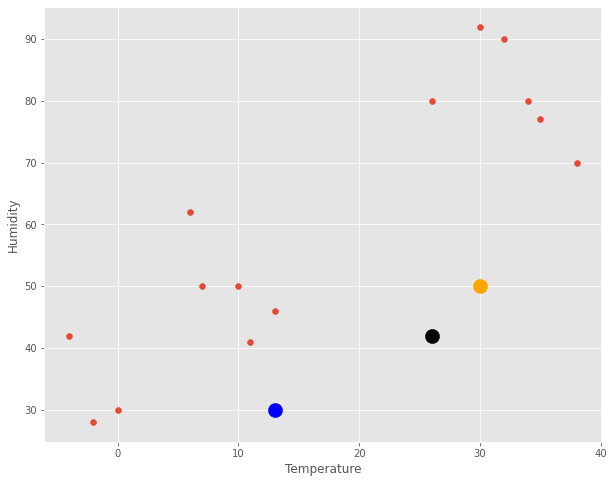

In [304]:
plt.figure(figsize=(10,8))
plt.scatter(temperature['temperature'],temperature['Humidity'])
plt.scatter([centroid_init_class1[0]],[centroid_init_class1[1]],c='b',s=200)
plt.scatter([centroid_init_class2[0]],[centroid_init_class2[1]],c='orange',s=200)
plt.scatter([centroid_init_class3[0]],[centroid_init_class3[1]],c='black',s=200)
plt.xlabel("Temperature")
plt.ylabel("Humidity")

## Let us compute the nearest distance and classify the pattern

In [305]:
temperature['label'] =''

#temperature=[]


#temperature['label'] = temperature['label'].apply(lambda x: nearest_cluster(centroid_init_class1,centroid_init_class2,centroid_init_class3))

In [306]:
t = temperature.copy()
t = t.drop('label',axis=1)
t = np.array(t)
label =nearest_cluster(t,centroid_init_class1,centroid_init_class2,centroid_init_class3) 

54.230987451824994    30.265491900843113    38.8329756778952
62.93647591023825    40.049968789001575    48.373546489791295
47.16990566028302    21.540659228538015    30.463092423455635
64.28841264178172    42.0    50.15974481593781
51.894122981316485    27.459060435491963    36.138621999185304
51.66236541235796    30.265491900843113    38.0
16.0    17.46424919657298    13.601470508735444
11.180339887498949    21.02379604162864    15.033296378372908
20.8806130178211    23.0    20.615528128088304
15.132745950421556    38.8329756778952    31.304951684997057
32.7566787083184    26.832815729997478    28.284271247461902
13.0    36.05551275463989    28.635642126552707
20.808652046684813    34.92849839314596    30.0
20.223748416156685    20.0    17.88854381999832


### Let us add the label column in the output 
- The column is just the perdiction which the algorithm has made
- The label column is not present in the data set

In [307]:
temperature['label'] = label

temperature

,temperature,Humidity,label
0,34,80,c2
1,32,90,c2
2,38,70,c2
3,30,92,c2
4,35,77,c2
5,26,80,c2
6,13,46,c3
7,11,41,c1
8,7,50,c3
9,-2,28,c1


## The labels are assigned artificially just to track in the demo
- Clustring is a method of unsupervised learning so there are no labels in the data
- The Data Set is just for demo



## Let us visualize after prediction

- The model has done some prediction but its not the best one
- This process is iterative untill we get the best prediction i.e less variance from the centeroid

Text(0, 0.5, 'Humidity')

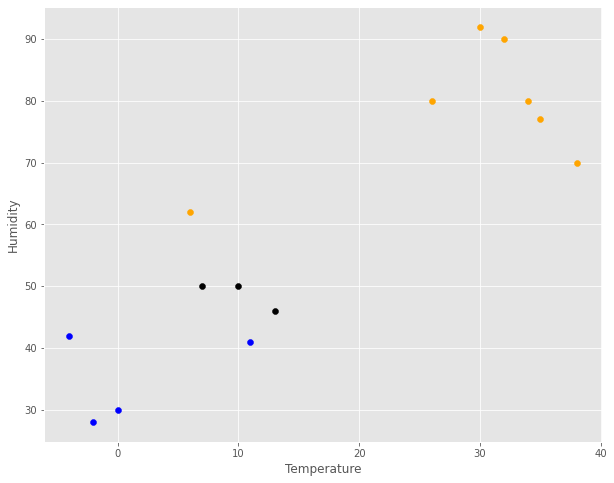

In [308]:
plt.figure(figsize=(10,8))
plt.scatter(temperature[temperature['label'] == 'c1'].loc[:,['temperature']],  temperature[temperature['label'] == 'c1'].loc[:,['Humidity']],c='b')
plt.scatter(temperature[temperature['label'] == 'c2'].loc[:,['temperature']],  temperature[temperature['label'] == 'c2'].loc[:,['Humidity']],c='orange')
plt.scatter(temperature[temperature['label'] == 'c3'].loc[:,['temperature']],  temperature[temperature['label'] == 'c3'].loc[:,['Humidity']],c='black')
plt.xlabel("Temperature")
plt.ylabel("Humidity")

## Some what it has predicted the clomate clusters correctly

- But this is not the best prediction
- There are still mismatch in the data
- We will now re iterate the process




### Now let us calculate the centeroid


#### The centeroid will now shift closer and the predictions will improve

Let us see that in the next iteration

In [309]:
def get_centeroid(df,c1,c2,c3):
    cx1,cy1 = df[df['label']==c1].temperature.sum()/len(df[df['label']==c1]) , df[df['label']==c1].Humidity.sum()/len(df[df['label']==c1])
    print(cx1,cy1)
    cx2,cy2 = df[df['label']==c2].temperature.sum()/len(df[df['label']==c2]) , df[df['label']==c2].Humidity.sum()/len(df[df['label']==c2])
    print(cx2,cy2)
    cx3,cy3 = df[df['label']==c3].temperature.sum()/len(df[df['label']==c3]) , df[df['label']==c3].Humidity.sum()/len(df[df['label']==c3])
    print(cx3,cy3)
    return (cx1,cy1),(cx2,cy2),(cx3,cy3)

In [310]:
c1,c2,c3 = get_centeroid(temperature,"c1","c2","c3")

1.25 35.25
28.714285714285715 78.71428571428571
10.0 48.666666666666664


In [311]:
temperature[temperature['label']=='c1'].temperature.sum()/temperature.shape[0]

0.35714285714285715

## Let us plot agian with new centeroids

Text(0, 0.5, 'Humidity')

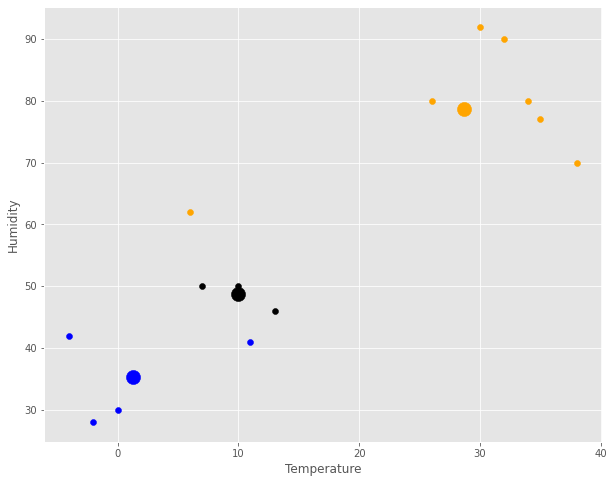

In [312]:
plt.figure(figsize=(10,8))
plt.scatter(temperature[temperature['label'] == 'c1'].loc[:,['temperature']],  temperature[temperature['label'] == 'c1'].loc[:,['Humidity']],c='b')
plt.scatter(temperature[temperature['label'] == 'c2'].loc[:,['temperature']],  temperature[temperature['label'] == 'c2'].loc[:,['Humidity']],c='orange')
plt.scatter(temperature[temperature['label'] == 'c3'].loc[:,['temperature']],  temperature[temperature['label'] == 'c3'].loc[:,['Humidity']],c='black')

plt.scatter([c1[0]],[c1[1]],c='b',s=200)
plt.scatter([c2[0]],[c2[1]],c='orange',s=200)
plt.scatter([c3[0]],[c3[1]],c='black',s=200)

plt.xlabel("Temperature")
plt.ylabel("Humidity")

## The centeroid are  marked ith bigger circles
- The centeroids are shifted
- Now the prediction will definately improve in next iteration
- So now again we will find shortest distance
- Once we get  the shortest distance we will classify again

58.93876294746758    2.1213203435596424    38.95125158451266
66.0841214749134    8.514693182963201    46.11724189497893
54.262735320332354    12.747548783981962    35.014282800023196
66.8264751260889    10.793516572461451    46.959557067757785
57.23441078387876    5.1478150704935    37.35237609577201
54.4222176852228    6.670832032063167    34.4615728021807
19.632739096836293    40.50308630215727    5.234500931320958
15.09230856356236    45.8530260724415    8.944271909999156
18.94143019356716    40.527768258318886    2.4083189157584597
5.333333333333336    63.65924913160695    24.600812994695925
29.762019047399615    32.901367752724205    12.664912159190054
3.8873012632302024    60.897454790820284    21.91802910847597
8.894442709417554    53.781967238099426    15.504837954651443
20.537229067665816    38.71046370169182    0.6324555320336764


Text(0, 0.5, 'Humidity')

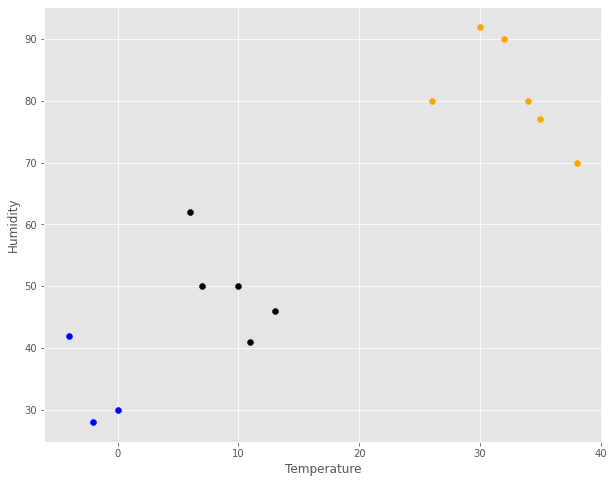

In [315]:
t = temperature.copy()
temperature
t = t.drop('label',axis=1)
t = np.array(t)
label =nearest_cluster(t,c1,c2,c3) 
temperature['label'] = label

# Now we will plot

plt.figure(figsize=(10,8))
plt.scatter(temperature[temperature['label'] == 'c1'].loc[:,['temperature']],  temperature[temperature['label'] == 'c1'].loc[:,['Humidity']],c='b')
plt.scatter(temperature[temperature['label'] == 'c2'].loc[:,['temperature']],  temperature[temperature['label'] == 'c2'].loc[:,['Humidity']],c='orange')
plt.scatter(temperature[temperature['label'] == 'c3'].loc[:,['temperature']],  temperature[temperature['label'] == 'c3'].loc[:,['Humidity']],c='black')
plt.xlabel("Temperature")
plt.ylabel("Humidity")

# Not much change in the prediction
- We will repeat the above step again

-2.0 33.333333333333336
32.5 81.5
9.4 49.8


Text(0, 0.5, 'Humidity')

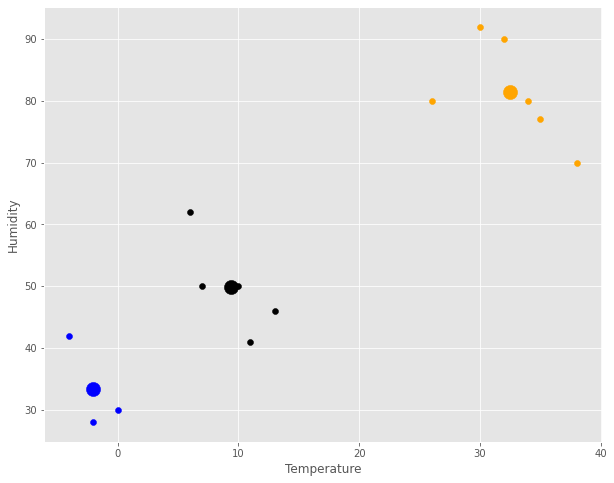

In [316]:
c1,c2,c3 = get_centeroid(temperature,"c1","c2","c3")



plt.figure(figsize=(10,8))
plt.scatter(temperature[temperature['label'] == 'c1'].loc[:,['temperature']],  temperature[temperature['label'] == 'c1'].loc[:,['Humidity']],c='b')
plt.scatter(temperature[temperature['label'] == 'c2'].loc[:,['temperature']],  temperature[temperature['label'] == 'c2'].loc[:,['Humidity']],c='orange')
plt.scatter(temperature[temperature['label'] == 'c3'].loc[:,['temperature']],  temperature[temperature['label'] == 'c3'].loc[:,['Humidity']],c='black')

plt.scatter([c1[0]],[c1[1]],c='b',s=200)
plt.scatter([c2[0]],[c2[1]],c='orange',s=200)
plt.scatter([c3[0]],[c3[1]],c='black',s=200)

plt.xlabel("Temperature")
plt.ylabel("Humidity")

## After certain number of iterations centeroid is not going to shift anymore and algorithm will  stop the iteration

## Now the predictons are good and every thing seems to be clustered correctly. We will stop the process now after the second iteration

This process looks lenghty but python has ML library for unsupervised learning

- We dont have to worry much on building the algorithm from scratch 
- This is just demo